Perform Analysis on the dataset with following sections:
1. High level statistics of a dataset: number of points, number of features, number of classes, datapoints per class
2. explain our objectives
3. perform univariate analysis (PDF,CDF, Boxplot) to understand which features are useful towards classification
4. perform bi variate analysis(scatter plots, pair plots) to see if combination of features are useful in classification

Objective: To classify the given flower into the categories mentioned depending on the features given in the dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
iris = pd.read_csv('iris.csv')

In [30]:
iris.shape

(150, 5)

Dataset is of 5 columns and 150 datapoints/records

4 columns are independent variable/feature
Sepal Length cm
Sepal Width cm
Petal Length cm
petal width cm

1 dependent variable
species

In [32]:
iris.columns

Index(['Sepal Length cm', 'Sepal Width cm', 'Petal Length cm',
       'petal width cm', 'species'],
      dtype='object')

In [33]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

Balanced dataset with dependent feature equally distributed among 3 categories

1. Iris-setosa
2. Iris-virginica
3. Iris-versicolor

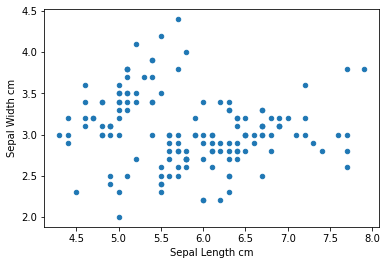

In [38]:
iris.plot(kind= 'scatter',x = 'Sepal Length cm', y = 'Sepal Width cm')
plt.show()

Cannot make much sense of data from the scatter plot so we will try to put in some color into the dataset

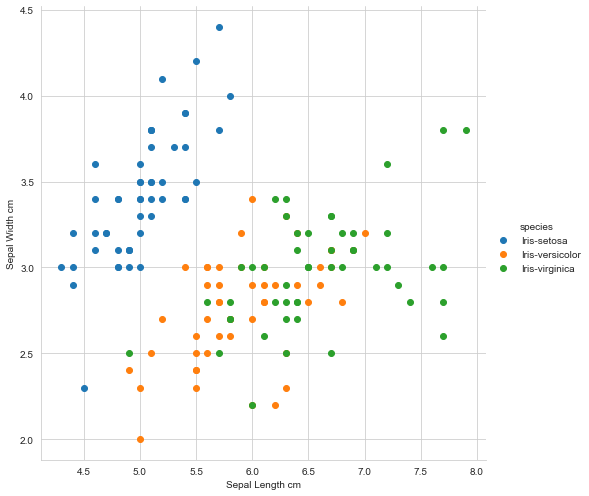

In [44]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'species', size = 7)\
   .map(plt.scatter, 'Sepal Length cm', 'Sepal Width cm')\
   .add_legend()
plt.show()

Observation:
1. Using Sepal_length and sepal_width feature, we can distinguish setosa flower from others
2. seperating Versicolor from Virginica is much harder as they have considerable overlap.

In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal Length cm  150 non-null    float64
 1   Sepal Width cm   150 non-null    float64
 2   Petal Length cm  150 non-null    float64
 3   petal width cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


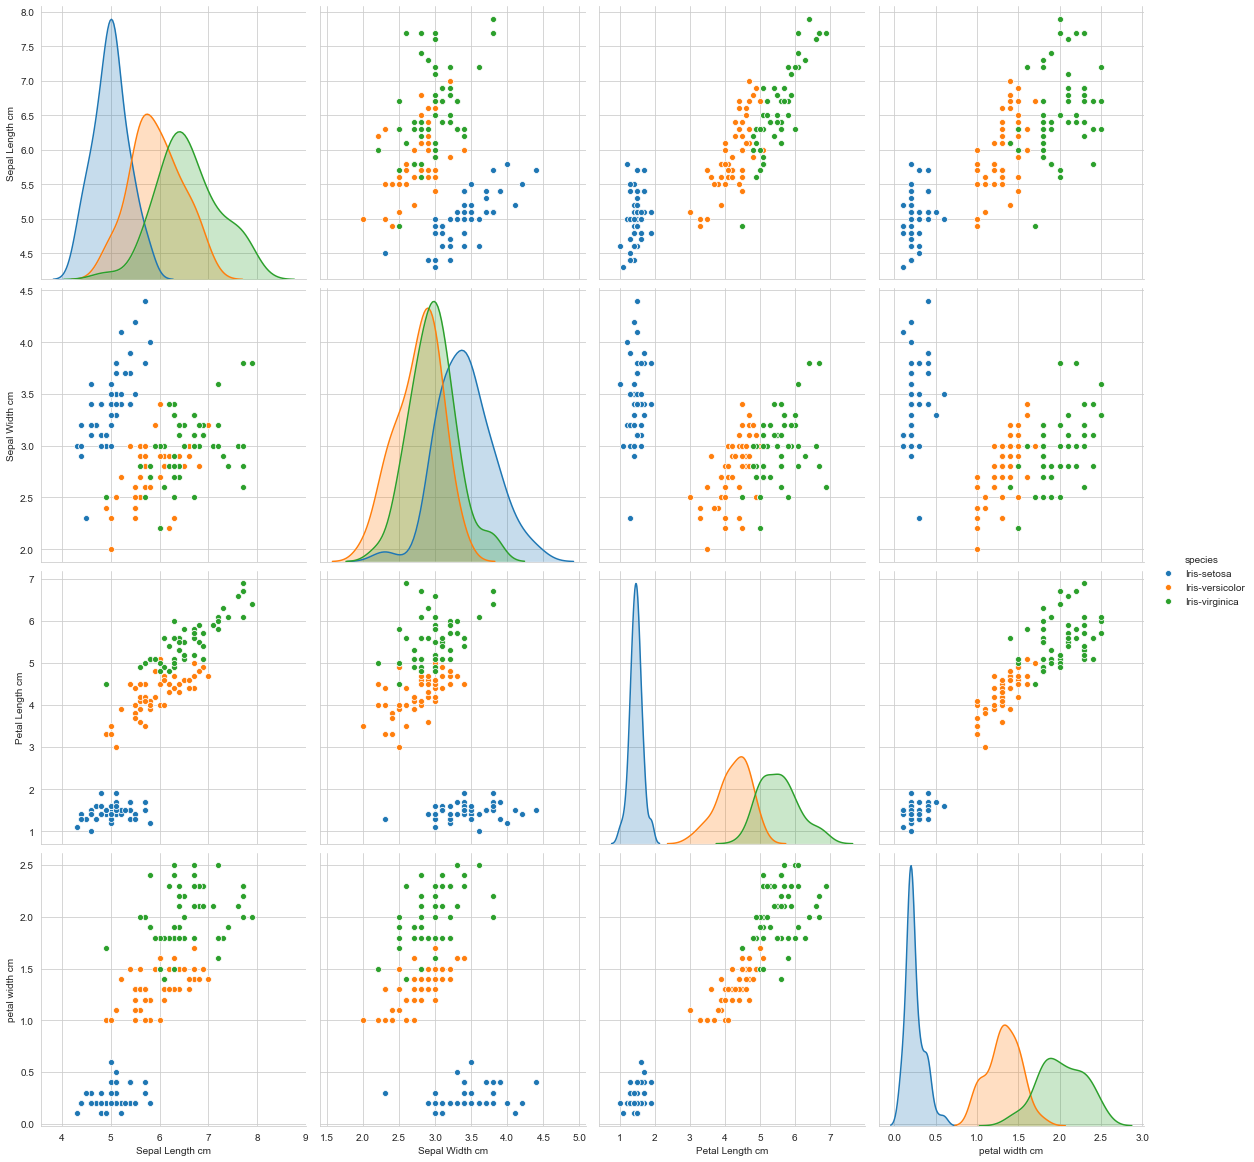

In [47]:
sns.set_style('whitegrid')
sns.pairplot(iris, hue = 'species', size = 4)
plt.show()

Observations
1. petal lenght and petal width are the most useful features to identify various flower types.
2. While setosa can be easily identified(linearly seperable), Virginica and Versicolor have some overlap of data points.(almost linearly separable)
3. We can find 'lines' and 'if-else' conditions to build a simple model to classify the flower types.
4. In plot (3,2) we can make our conclusions and define the category in which the flower belongs to

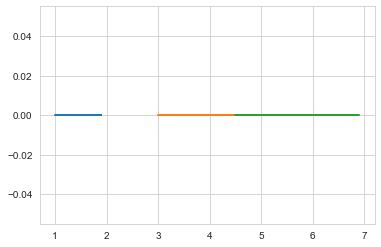

In [51]:
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa']
iris_virginica = iris.loc[iris['species'] == 'Iris-virginica']
iris_versicolor = iris.loc[iris['species'] == 'Iris-versicolor']

plt.plot(iris_setosa['Petal Length cm'],np.zeros_like(iris_setosa['Petal Length cm']))
plt.plot(iris_versicolor['Petal Length cm'],np.zeros_like(iris_versicolor['Petal Length cm']))
plt.plot(iris_virginica['Petal Length cm'],np.zeros_like(iris_virginica['Petal Length cm']))


c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


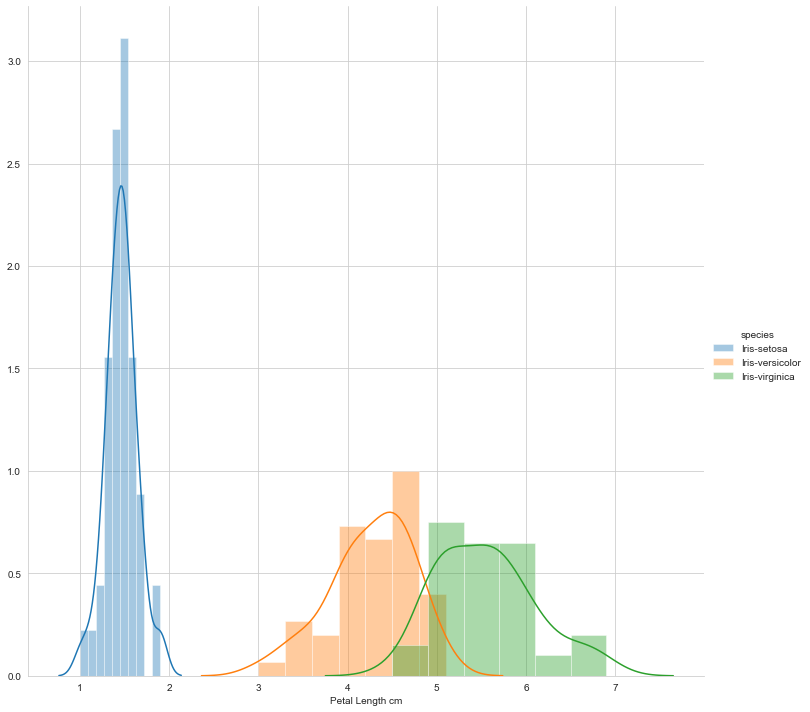

In [56]:
sns.FacetGrid(iris, hue = 'species', size = 10)\
   .map(sns.distplot, 'Petal Length cm')\
   .add_legend()
plt.show()

c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


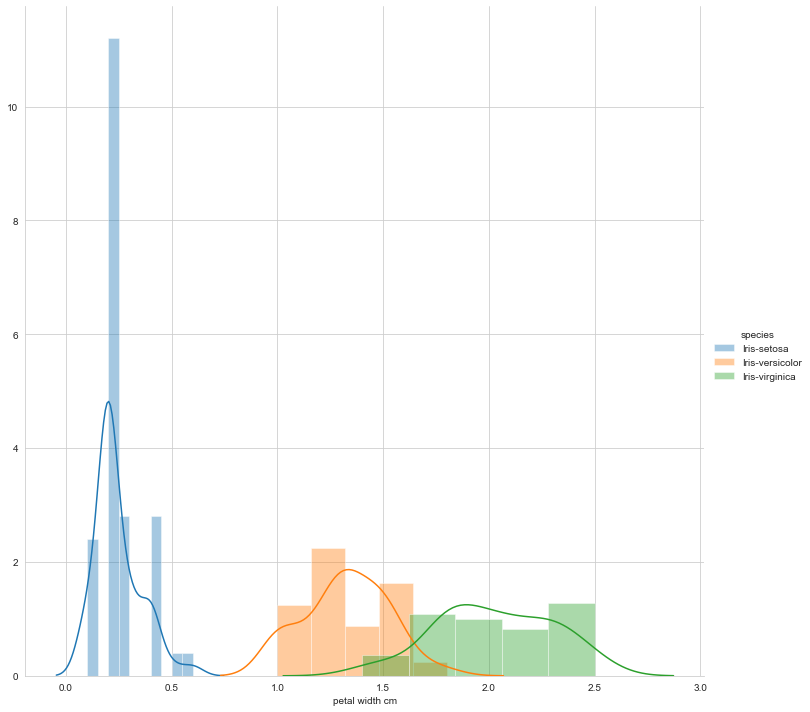

In [57]:
sns.FacetGrid(iris, hue = 'species', size = 10)\
   .map(sns.distplot, 'petal width cm')\
   .add_legend()
plt.show()

c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


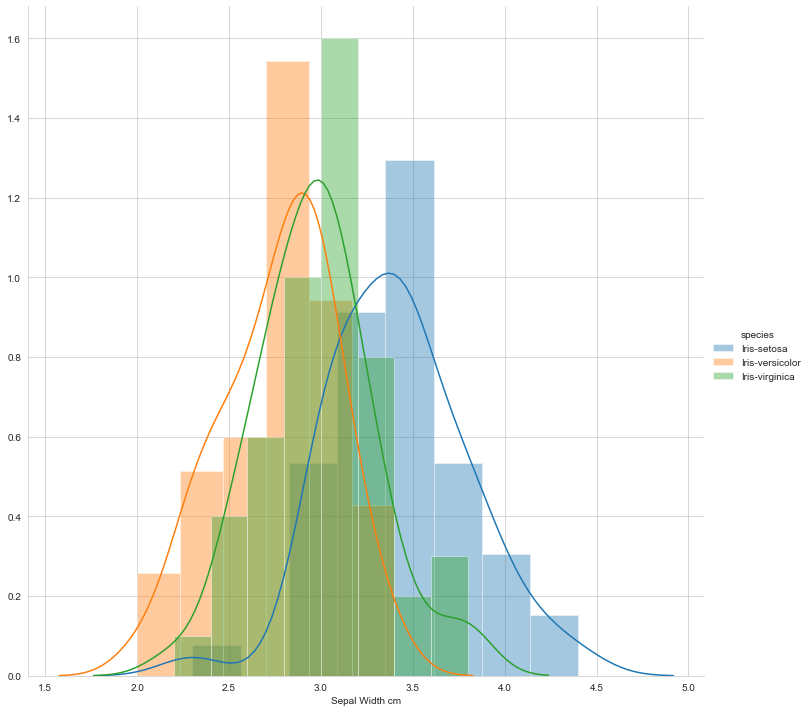

In [58]:
sns.FacetGrid(iris, hue = 'species', size = 10)\
   .map(sns.distplot, 'Sepal Width cm')\
   .add_legend()
plt.show()

c:\users\91974\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


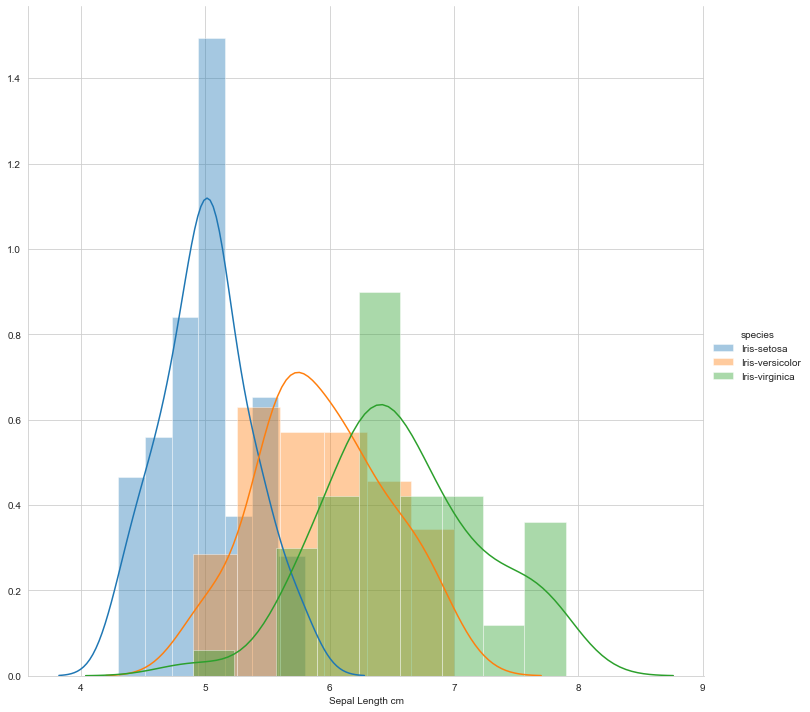

In [59]:
sns.FacetGrid(iris, hue = 'species', size = 10)\
   .map(sns.distplot, 'Sepal Length cm')\
   .add_legend()
plt.show()

CDF shows what percentage of flower belongs to a class from the plot.


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


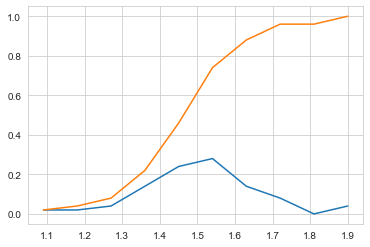

In [60]:
# Plot  CDF of Petal Length
counts, bin_edges = np.histogram(iris_setosa['Petal Length cm'], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Computing CDF

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


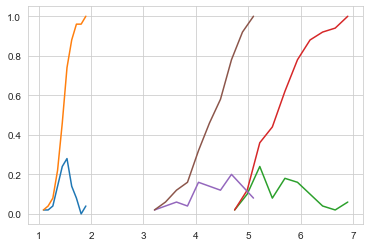

In [62]:
# Plots of CDF of Petal Length for various types of flowers
# Misclassification error if you use petal lenght only

counts, bin_edges = np.histogram(iris_setosa['Petal Length cm'], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Computing CDF

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(iris_virginica['Petal Length cm'], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Computing CDF

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(iris_versicolor['Petal Length cm'], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Computing CDF

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

Calculating Mean, Variance and Std-Devaition

In [66]:
print('Mean: ')
print(np.mean(iris_setosa['Petal Length cm']))
#Mean with an outlier
print(np.mean(np.append(iris_setosa['Petal Length cm'],50)))
print(np.mean(iris_virginica['Petal Length cm']))
print(np.mean(iris_versicolor['Petal Length cm']))

print('\nStd-Dev: ')
print(np.std(iris_setosa['Petal Length cm']))
print(np.std(iris_virginica['Petal Length cm']))
print(np.std(iris_versicolor['Petal Length cm']))

Mean: 
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-Dev: 
0.17176728442867112
0.546347874526844
0.4651881339845203


In [83]:
#Median, Quantiles, Percentiles, IQR.

print('\nMedian: ')
print(np.median(iris_setosa['Petal Length cm']))
#median with outlier
print(np.median(np.append(iris_setosa['Petal Length cm'],50)))
print(np.median(iris_virginica['Petal Length cm']))
print(np.median(iris_versicolor['Petal Length cm']))

print('\nQuantiles: ')
print(np.percentile(iris_setosa['Petal Length cm'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['Petal Length cm'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['Petal Length cm'],np.arange(0,100,25)))

print('\n90th Percentiles')
print(np.percentile(iris_setosa['Petal Length cm'],90))
print(np.percentile(iris_virginica['Petal Length cm'],90))
print(np.percentile(iris_versicolor['Petal Length cm'],90))

from statsmodels import robust
print('\nMedian Absolute Deviation')
print(robust.mad(iris_setosa['Petal Length cm']))
print(robust.mad(iris_virginica['Petal Length cm']))
print(robust.mad(iris_versicolor['Petal Length cm']))


Median: 
1.5
1.5
5.55
4.35

Quantiles: 
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


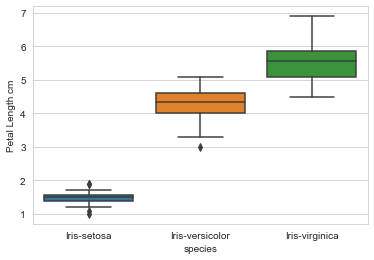

In [84]:
#boxplot
sns.boxplot(x = 'species',y= 'Petal Length cm', data = iris)

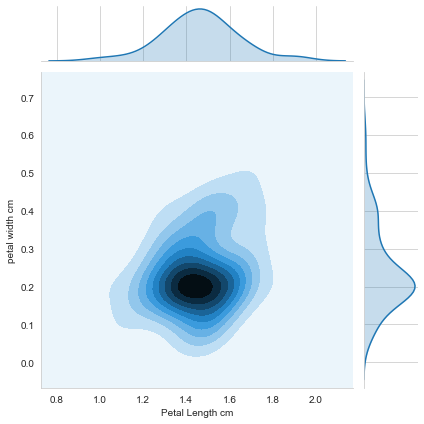

In [89]:
#Density plot
sns.jointplot(x = 'Petal Length cm',y='petal width cm',data = iris_setosa, kind= 'kden')